### 1. Importing and Preprocessing Data

In [1]:
import pandas as pd

In [2]:
# reading the training data
imdb = pd.read_csv("movie_review_train.csv")
imdb.head()

,class,text
0,Pos,a common complaint amongst film critics is ...
1,Pos,whew this film oozes energy the kind of b...
2,Pos,steven spielberg s amistad which is bas...
3,Pos,he has spent his entire life in an awful litt...
4,Pos,being that it is a foreign language film with...


In [3]:
imdb_test=pd.read_csv("movie_review_test.csv")
imdb_test.head()

,class,text
0,Pos,films adapted from comic books have had plent...
1,Pos,every now and then a movie comes along from a...
2,Pos,you ve got mail works alot better than it des...
3,Pos,jaws is a rare film that grabs your atte...
4,Pos,moviemaking is a lot like being the general m...


In [4]:
len(imdb), len(imdb_test)

(1600, 400)

In [5]:
# counting positive and negative ratings
imdb['class'].value_counts()

class
Pos    800
Neg    800
Name: count, dtype: int64

In [6]:
imdb_test['class'].value_counts()

class
Pos    200
Neg    200
Name: count, dtype: int64

In [7]:
# mapping labels to 0 and 1
imdb['label'] = imdb['class'].map({'Neg':0, 'Pos':1})

In [8]:
imdb.head()

,class,text,label
0,Pos,a common complaint amongst film critics is ...,1
1,Pos,whew this film oozes energy the kind of b...,1
2,Pos,steven spielberg s amistad which is bas...,1
3,Pos,he has spent his entire life in an awful litt...,1
4,Pos,being that it is a foreign language film with...,1


In [9]:
# we can now drop the column 'class'
imdb = imdb.drop('class', axis=1)
imdb.head()

,text,label
0,a common complaint amongst film critics is ...,1
1,whew this film oozes energy the kind of b...,1
2,steven spielberg s amistad which is bas...,1
3,he has spent his entire life in an awful litt...,1
4,being that it is a foreign language film with...,1


In [10]:
# mapping labels to 0 and 1 on test data
imdb_test['label'] = imdb_test['class'].map({'Neg':0, 'Pos':1})

In [11]:
imdb_test.head()

,class,text,label
0,Pos,films adapted from comic books have had plent...,1
1,Pos,every now and then a movie comes along from a...,1
2,Pos,you ve got mail works alot better than it des...,1
3,Pos,jaws is a rare film that grabs your atte...,1
4,Pos,moviemaking is a lot like being the general m...,1


In [12]:
# we can now drop the column 'class'
imdb_test = imdb_test.drop('class', axis=1)
imdb_test.head()

,text,label
0,films adapted from comic books have had plent...,1
1,every now and then a movie comes along from a...,1
2,you ve got mail works alot better than it des...,1
3,jaws is a rare film that grabs your atte...,1
4,moviemaking is a lot like being the general m...,1


In [13]:
# convert to X and y
X_train = imdb['text']
y_train = imdb['label']
print(X_train.shape)
print(X_train.shape)

(1600,)
(1600,)


In [14]:
X_train.head()

0     a common complaint amongst film critics is   ...
1     whew   this film oozes energy   the kind of b...
2     steven spielberg s   amistad     which is bas...
3     he has spent his entire life in an awful litt...
4     being that it is a foreign language film with...
Name: text, dtype: object

In [15]:
y_train.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [16]:
# vectorizing the sentences; removing stop words
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words='english')

In [17]:
vect.fit(X_train)

CountVectorizer(stop_words='english')

In [18]:
# printing the vocabulary
vect.vocabulary_

{'common': 6284,
 'complaint': 6360,
 'film': 11832,
 'critics': 7378,
 'aren': 1810,
 'literate': 18603,
 'scripts': 27918,
 'available': 2319,
 'quiz': 25250,
 'gives': 13262,
 'signs': 28809,
 'hope': 15074,
 'art': 1928,
 'writing': 35521,
 'isn': 16771,
 'dead': 7904,
 'hollywood': 14963,
 'need': 21281,
 'look': 18770,
 'independent': 15988,
 'films': 11851,
 'thoughtful': 32060,
 'content': 6771,
 'paul': 23045,
 'attanasio': 2173,
 'script': 27912,
 'takes': 31486,
 'tepid': 31839,
 'thriller': 32090,
 'scandals': 27629,
 'late': 18017,
 '50s': 313,
 'delivers': 8215,
 'telling': 31765,
 'parable': 22815,
 'emptiness': 10340,
 'post': 24178,
 'war': 34707,
 'american': 1334,
 'dream': 9554,
 'golden': 13449,
 'bubble': 4285,
 'surrounds': 31156,
 'protects': 24849,
 'tv': 33056,
 'networks': 21378,
 'sponsors': 29948,
 'riddled': 26743,
 'symbols': 31370,
 '58': 328,
 'chrysler': 5614,
 'radio': 25314,
 'announcement': 1534,
 'sputnik': 30053,
 'heavy': 14532,
 'handed': 14185,

In [19]:
# vocab size
len(vect.vocabulary_.keys())

35858

In [20]:
vect1 = CountVectorizer(stop_words='english', min_df=.03, max_df=.8)

In [21]:
vect1.fit(X_train)

CountVectorizer(max_df=0.8, min_df=0.03, stop_words='english')

In [22]:
vect1.vocabulary_

{'common': 264,
 'critics': 323,
 'aren': 78,
 'available': 101,
 'gives': 618,
 'hope': 693,
 'art': 81,
 'writing': 1632,
 'isn': 753,
 'dead': 342,
 'hollywood': 690,
 'need': 970,
 'look': 853,
 'films': 549,
 'content': 287,
 'paul': 1037,
 'script': 1248,
 'takes': 1429,
 'thriller': 1471,
 'late': 805,
 'delivers': 357,
 'telling': 1449,
 'post': 1089,
 'war': 1571,
 'american': 59,
 'dream': 413,
 'tv': 1512,
 'radio': 1145,
 'heavy': 673,
 'direction': 386,
 'robert': 1205,
 'performances': 1043,
 'john': 766,
 'rob': 1204,
 'perfectly': 1041,
 'usually': 1537,
 'quality': 1136,
 'sets': 1272,
 'camera': 192,
 'work': 1618,
 'recent': 1165,
 'century': 213,
 'period': 1044,
 'pieces': 1056,
 'years': 1638,
 'old': 1001,
 'images': 716,
 'true': 1502,
 'era': 464,
 'generation': 605,
 'gone': 625,
 '15': 4,
 'world': 1623,
 'themes': 1461,
 'good': 626,
 'life': 831,
 'family': 508,
 'match': 894,
 'father': 521,
 'fame': 506,
 'audience': 99,
 'appear': 72,
 'familiar': 507,
 

In [23]:
len(vect1.vocabulary_.keys())

1643

In [24]:
X_test = imdb_test['text']
y_test = imdb_test['label']
print(X_test.shape)
print(X_test.shape)

(400,)
(400,)


In [25]:
# transforming the train and test datasets
X_train_transformed = vect1.transform(X_train)
X_test_transformed = vect1.transform(X_test)

In [26]:
# note that the type is transformed (sparse) matrix
print(type(X_train_transformed))
print(X_train_transformed)

<class 'scipy.sparse._csr.csr_matrix'>
  (0, 4)	1
  (0, 59)	2
  (0, 72)	1
  (0, 78)	1
  (0, 81)	1
  (0, 99)	3
  (0, 101)	1
  (0, 192)	1
  (0, 211)	1
  (0, 213)	1
  (0, 220)	1
  (0, 264)	2
  (0, 287)	1
  (0, 316)	1
  (0, 323)	1
  (0, 328)	1
  (0, 340)	1
  (0, 342)	1
  (0, 357)	1
  (0, 386)	1
  (0, 413)	2
  (0, 445)	2
  (0, 464)	1
  (0, 503)	1
  (0, 506)	1
  :	:
  (1599, 1247)	1
  (1599, 1258)	2
  (1599, 1267)	1
  (1599, 1271)	1
  (1599, 1331)	1
  (1599, 1335)	1
  (1599, 1339)	1
  (1599, 1366)	3
  (1599, 1371)	1
  (1599, 1375)	1
  (1599, 1379)	1
  (1599, 1413)	1
  (1599, 1421)	1
  (1599, 1429)	2
  (1599, 1447)	1
  (1599, 1501)	1
  (1599, 1533)	1
  (1599, 1550)	1
  (1599, 1555)	1
  (1599, 1556)	1
  (1599, 1570)	1
  (1599, 1579)	2
  (1599, 1589)	1
  (1599, 1609)	1
  (1599, 1616)	1


In [27]:
print(type(X_test_transformed))
print(X_test_transformed)

<class 'scipy.sparse._csr.csr_matrix'>
  (0, 11)	1
  (0, 18)	2
  (0, 23)	1
  (0, 29)	1
  (0, 31)	1
  (0, 53)	1
  (0, 73)	1
  (0, 94)	1
  (0, 110)	1
  (0, 118)	1
  (0, 133)	1
  (0, 134)	1
  (0, 140)	1
  (0, 141)	1
  (0, 151)	3
  (0, 152)	1
  (0, 173)	1
  (0, 176)	1
  (0, 177)	1
  (0, 188)	2
  (0, 189)	1
  (0, 195)	1
  (0, 197)	1
  (0, 203)	1
  (0, 206)	1
  :	:
  (399, 1314)	2
  (399, 1325)	1
  (399, 1354)	1
  (399, 1371)	1
  (399, 1375)	2
  (399, 1382)	1
  (399, 1399)	2
  (399, 1411)	1
  (399, 1416)	1
  (399, 1418)	1
  (399, 1430)	1
  (399, 1463)	2
  (399, 1471)	1
  (399, 1475)	1
  (399, 1514)	2
  (399, 1516)	1
  (399, 1542)	1
  (399, 1546)	2
  (399, 1549)	1
  (399, 1609)	3
  (399, 1632)	1
  (399, 1633)	3
  (399, 1637)	1
  (399, 1638)	1
  (399, 1641)	2


In [28]:
X_test_transformed.size

51663

### 2. Building and Evaluating the Model

In [29]:
from sklearn.naive_bayes import BernoulliNB

# instantiate bernoulli NB object
bnb = BernoulliNB()

# fit 
bnb.fit(X_train_transformed,y_train)

# predict class
y_pred_class = bnb.predict(X_test_transformed)

# predict probability
y_pred_proba =bnb.predict_proba(X_test_transformed)

# accuracy
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.79

In [30]:
# training the NB model and making predictions
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

# fit
mnb.fit(X_train_transformed,y_train)

# predict class
y_pred_class_multi = mnb.predict(X_test_transformed)

# predict probabilities
y_pred_proba_multi = mnb.predict_proba(X_test_transformed)


### Model Evaluation

In [31]:
# printing the overall accuracy
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class_multi)

0.8275

In [32]:
# confusion matrix bernoulli
metrics.confusion_matrix(y_test, y_pred_class)
# help(metrics.confusion_matrix)

array([[177,  23],
       [ 61, 139]], dtype=int64)

In [33]:
#bernoulli
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

[[177  23]
 [ 61 139]]


In [34]:
#multinomial
confusion = metrics.confusion_matrix(y_test, y_pred_class_multi)
print(confusion)
TN_M = confusion[0, 0]
FP_M = confusion[0, 1]
FN_M = confusion[1, 0]
TP_M = confusion[1, 1]

[[172  28]
 [ 41 159]]


In [35]:
#bernoulli
sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)

sensitivity 0.695


In [36]:
#bernoulli
specificity = TN / float(TN + FP)
print("specificity",specificity)

specificity 0.885


In [37]:
#bernoulli
precision = TP / float(TP + FP)
print("precision",precision)
print(metrics.precision_score(y_test, y_pred_class))

precision 0.8580246913580247
0.8580246913580247


In [38]:
#bernoulli
print("precision",precision)
print("PRECISION SCORE :",metrics.precision_score(y_test, y_pred_class))
print("RECALL SCORE :", metrics.recall_score(y_test, y_pred_class))
print("F1 SCORE :",metrics.f1_score(y_test, y_pred_class))

precision 0.8580246913580247
PRECISION SCORE : 0.8580246913580247
RECALL SCORE : 0.695
F1 SCORE : 0.7679558011049724


In [39]:
# creating an ROC curve bernoulli
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

In [40]:
# area under the curve bernoulli
print (roc_auc)

0.87275


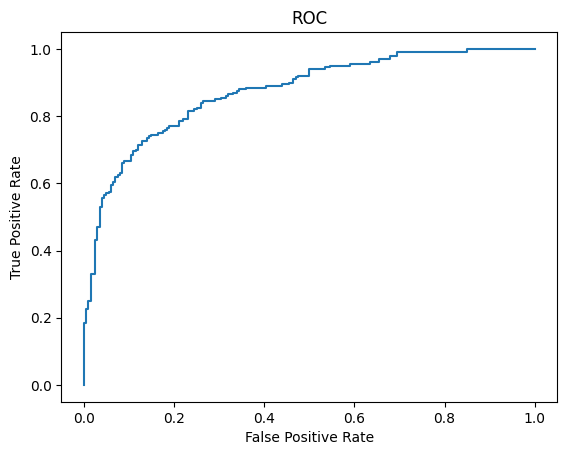

In [41]:
# plotting the ROC curve bernoulli
%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)
plt.show()